In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Scalers and Inverse Transformations in Machine Learning

**Scalers** are used to normalize or standardize features in a dataset, which is crucial for many machine learning algorithms. Normalization and standardization are types of feature scaling that adjust the range and distribution of the data.

### Types of Scalers

1. **Min-Max Scaler (`MinMaxScaler`)**:
   - **Normalization**: Scales the data to a fixed range, typically [0, 1] or [-1, 1].
   - **Formula**: \( X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - **Inverse Transformation**: Converts the scaled data back to the original range.
     - **Formula**: \( X = X_{\text{scaled}} \cdot (X_{\text{max}} - X_{\text{min}}) + X_{\text{min}} \)

2. **Standard Scaler (`StandardScaler`)**:
   - **Standardization**: Scales the data to have a mean of 0 and a standard deviation of 1.
   - **Formula**: \( X_{\text{scaled}} = \frac{X - \mu}{\sigma} \)
   - **Inverse Transformation**: Converts the standardized data back to the original scale.
     - **Formula**: \( X = X_{\text{scaled}} \cdot \sigma + \mu \)

3. **Robust Scaler (`RobustScaler`)**:
   - **Normalization**: Uses the median and the interquartile range (IQR) for scaling.
   - **Formula**: \( X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}} \)
   - **Inverse Transformation**: Converts the scaled data back to the original scale.
     - **Formula**: \( X = X_{\text{scaled}} \cdot \text{IQR} + \text{median} \)

### Why Use Scalers?

1. **Improves Convergence**: Many machine learning algorithms (e.g., gradient descent) converge faster when features are scaled.
2. **Prevents Dominance**: Prevents features with larger ranges from dominating the learning process.
3. **Consistency**: Ensures consistent scaling across different features.

### Using MinMaxScaler in Python

Here's an example of how to use `MinMaxScaler` with an LSTM model for stock price prediction:

```python
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=100),
    'Close': np.random.rand(100) * 100
})

# Setting 'Date' as index
data.set_index('Date', inplace=True)

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Inverse transform example
scaled_back = scaler.inverse_transform(scaled_data)

# Plotting original and scaled data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(data.index, data['Close'], label='Original Data')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.plot(data.index, scaled_data, label='Scaled Data')
plt.title('Scaled Data')
plt.show()
```

### Inverse Transformation

Inverse transformation is crucial for interpreting the model's predictions in the original scale of the data. After the model makes predictions, the predictions are often in the scaled form. To understand these predictions in the original context (e.g., stock prices in dollars), you need to apply inverse transformation.

Here's an example of applying inverse transformation to predictions:

```python
# Assume y_pred is the model's prediction in scaled form
y_pred_scaled = np.random.rand(10, 1)  # Random scaled predictions for example

# Inverse transform the predictions
y_pred_original = scaler.inverse_transform(y_pred_scaled)

# Example of plotting predictions
plt.figure(figsize=(14, 7))
plt.plot(y_pred_original, label='Predicted Data (Original Scale)')
plt.title('Predicted Data')
plt.show()
```

### Handling Multidimensional Data

When dealing with LSTM models, ensure that data transformations maintain the correct dimensions. Here’s how you handle reshaping for inverse transformation:

```python
# Example LSTM data
y_train = np.random.rand(100, 1)  # Random training targets for example

# Reshape y_train to be 2-dimensional if needed
y_train_reshaped = y_train.reshape(-1, 1)

# Inverse transform
y_train_original = scaler.inverse_transform(y_train_reshaped)
```

By understanding and applying scalers and inverse transformations correctly, you can ensure that your machine learning models make accurate and interpretable predictions.

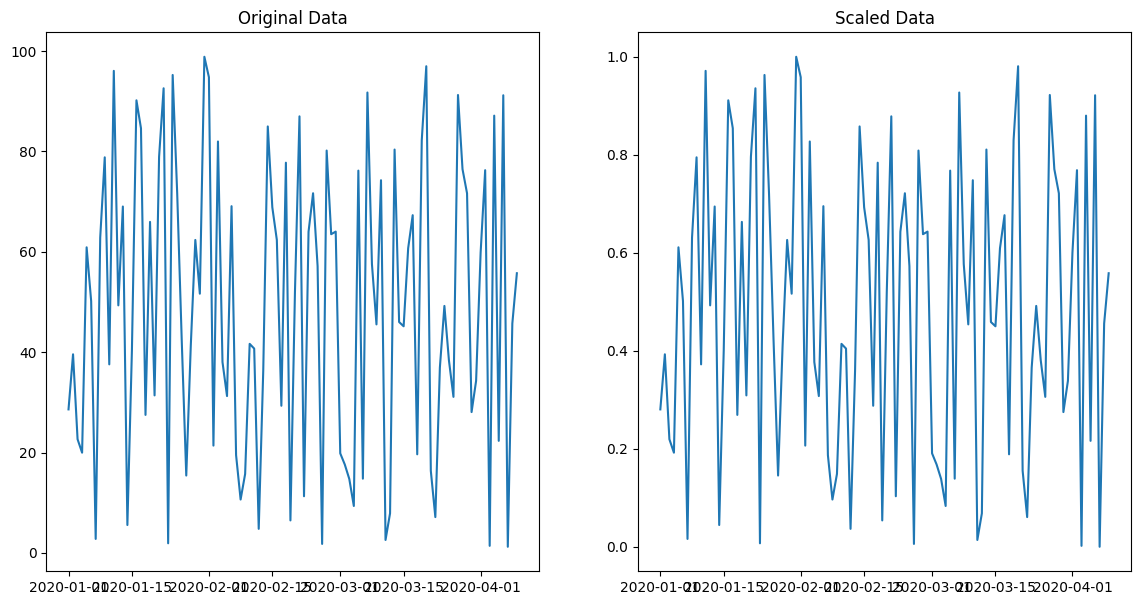

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=100),
    'Close': np.random.rand(100) * 100
})

# Setting 'Date' as index
data.set_index('Date', inplace=True)

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Inverse transform example
scaled_back = scaler.inverse_transform(scaled_data)

# Plotting original and scaled data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(data.index, data['Close'], label='Original Data')
plt.title('Original Data')
plt.subplot(1, 2, 2)
plt.plot(data.index, scaled_data, label='Scaled Data')
plt.title('Scaled Data')
plt.show()


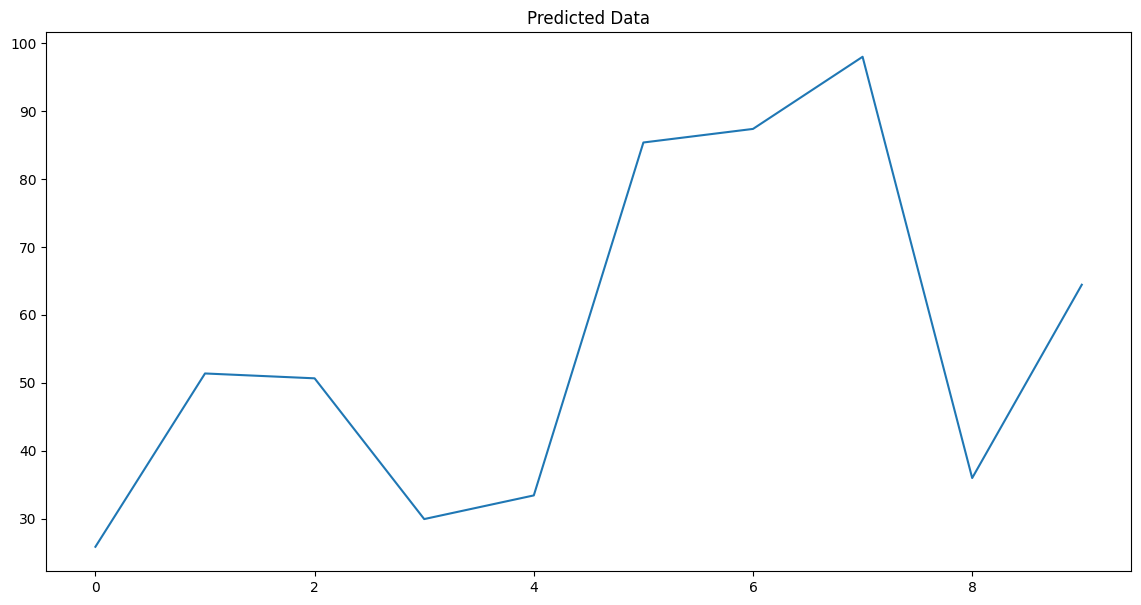

In [2]:
# Assume y_pred is the model's prediction in scaled form
y_pred_scaled = np.random.rand(10, 1)  # Random scaled predictions for example

# Inverse transform the predictions
y_pred_original = scaler.inverse_transform(y_pred_scaled)

# Example of plotting predictions
plt.figure(figsize=(14, 7))
plt.plot(y_pred_original, label='Predicted Data (Original Scale)')
plt.title('Predicted Data')
plt.show()


In [3]:
# Example LSTM data
y_train = np.random.rand(100, 1)  # Random training targets for example

# Reshape y_train to be 2-dimensional if needed
y_train_reshaped = y_train.reshape(-1, 1)

# Inverse transform
y_train_original = scaler.inverse_transform(y_train_reshaped)
